In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from tpot import TPOTRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 0

c:\Users\ikerm\.conda\envs\reto06\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
CARPETA_DATOS_ORIGINALES = 'Datos/Limpios/'
DF_VALORACION= pd.read_csv(os.path.join(CARPETA_DATOS_ORIGINALES, 'DF_VALORACION.csv'))

In [3]:
DF_VALORACION.head(5)

,Precio/Venta,Activo circulante mil EUR_2021,Fondos propios mil EUR_2021,Total activo mil EUR_2021,Total pasivo y capital propio mil EUR_2021,Fondo de maniobra mil EUR_2021,Deudores mil EUR_2021,Ingresos de explotacion mil EUR_2021,Importe neto Cifra de Ventas mil EUR_2021,Pasivo liquido mil EUR_2021,...,total_funding,Pasivo fijo mil EUR_2021,Gastos financieros mil EUR_2021,Resultado Explotacion mil EUR_2021,EBIT mil EUR_2021,Precio/Ebit,Resultado del Ejercicio mil EUR_2021,Result. ordinarios antes Impuestos mil EUR_2021,Importe neto Cifra de Ventas mil EUR_ratio,valuation_2022
0,0.001503,490.28324,691.37045,2530.72564,2530.72564,263.06256,275.07426,1044.885460,1038.25181,584.24969,...,0.85,1255.10550,65.05459,84.24150,84.24150,0.018518,16.01546,19.18691,2.151838,1.56
1,0.005532,1479.62916,819.45612,3199.56778,3199.56778,1336.34500,1338.59127,1311.048599,1279.75740,1016.82551,...,0.15,1363.28615,20.72344,206.35675,206.35675,0.034310,458.96532,185.63331,3.431432,7.08
2,0.011944,441.91773,246.02653,793.27522,793.27522,-26.46035,27.59070,494.230710,315.64584,276.19154,...,0.86,271.05715,5.31680,15.83807,15.83807,0.238034,8.41702,10.52127,5.189590,3.77
3,0.239921,138.02002,221.12203,344.22697,344.22697,76.69611,51.90871,27.039110,5.37678,33.26166,...,0.18,89.84328,2.62062,-127.36227,-127.36227,-0.010129,-103.98631,-129.98289,1.000000,1.29
4,0.004365,195.86569,91.45025,229.70534,229.70534,39.61634,5.86666,114.501870,84.77285,14.40424,...,0.13,123.85085,1.08264,-4.98759,-4.98759,-0.074184,-6.07023,-6.07023,1.846604,0.37


In [4]:
x=DF_VALORACION.loc[:, DF_VALORACION.columns !='valuation_2022']

In [5]:
y=DF_VALORACION['valuation_2022']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
[x_train.shape, x_test.shape]

[(45, 20), (15, 20)]

In [ ]:
corr = DF_VALORACION.corr()
c=plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)
plt.show()

: 

In [10]:
#Creamos carpeta para guardar algunos modelos de alta duración.
modelos="./modelos_regresion"
if not os.path.exists(modelos):
    os.makedirs(modelos)

In [10]:
modelo0_lr = LinearRegression() 
modelo0_lr.fit(x_train,y_train) 
y_pred = modelo0_lr.predict(x_test)
y_pred
mse = mean_squared_error(y_test, y_pred)
score_modelo0_lr=modelo0_lr.score(x_test, y_test)
RMSE_modelo0_lr=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo0_lr}')
print(f'The score obtained on test data is: {score_modelo0_lr}') 

The RMSE obtained on test data is: 41.64335342513463
The score obtained on test data is: -0.1798214295395857


In [11]:
modelo0_tr = TweedieRegressor()
modelo0_tr.fit(x_train, y_train)
predictions = modelo0_tr.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo0_tr=modelo0_tr.score(x_test, y_test)
RMSE_modelo0_tr=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo0_tr}')
print(f'The score obtained on test data is: {score_modelo0_tr}') 

The RMSE obtained on test data is: 47.57830674048272
The score obtained on test data is: -0.5400784872122308


**Stacking**

In [12]:
#Realizamos un stacking regressor simple
estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=0)), ('svr', SVR())]
modelo1_sr_simple = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
modelo1_sr_simple.fit(x_train, y_train)
predictions=modelo1_sr_simple.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo1_sr_simple=modelo1_sr_simple.score(x_test, y_test)
RMSE_modelo1_sr_simple=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_simple}')
print(f'The score obtained on test data is: {score_modelo1_sr_simple}')

The RMSE obtained on test data is: 35.104565516518775
The score obtained on test data is: 0.16159840665065128


In [13]:
#Definimos algunos modelos basicos
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level0.append(('lr', LinearRegression()))  
level1 = TweedieRegressor(max_iter=10000,alpha=0.5,link='log',power=0)

#Stacking
modelo1_sr_level1 = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
modelo1_sr_level1.fit(x_train,y_train)
predictions=modelo1_sr_level1.predict(x_test)
mse = mean_squared_error(y_test, predictions)

#Observamos los mejores resultados
score_modelo1_sr_level1=modelo1_sr_level1.score(x_test, y_test)
RMSE_modelo1_sr_level1=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level1}')
print(f'The score obtained on test data is: {score_modelo1_sr_level1}')

The RMSE obtained on test data is: 42.6811982703011
The score obtained on test data is: -0.23936177691765015


In [ ]:
# param_grid = {
# "knn__leaf_size": [1, 10, 30, 50],
# "knn__n_neighbors": [3, 5, 7],
# "cart__max_depth": [2,3,4],
# "cart__min_samples_leaf": [0.05,0.1],
# "svm__C": [0.01, 0.1,0.5, 1.0] ,
# "final_estimator__power":[0,1,2],
# "final_estimator__alpha":[1,5,20]
# }

# modelo1_sr_level1_gs = GridSearchCV(modelo1_sr_level1, param_grid, cv=5)
# modelo1_sr_level1_gs.fit(x_train, y_train)
# predictions=modelo1_sr_level1_gs.predict(x_test)
# mse = mean_squared_error(y_test, predictions)

# #Observamos los mejores resultados
# score_modelo1_sr_level1_gs=modelo1_sr_level1_gs.score(x_test, y_test)
# RMSE_modelo1_sr_level1_gs=np.sqrt(mse)
# print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level1_gs}')
# print(f'The score obtained on test data is: {score_modelo1_sr_level1_gs}')

In [ ]:
# #Guardamos el modelo
# filename = 'modelo1_sr_level1_gs.sav'
# ruta = './modelos_regresion/' + filename
# pickle.dump(modelo1_sr_level1_gs, open(ruta, 'wb'))

In [ ]:
# #cargamos el modelo y vemos los resultados
# filename = 'modelo1_sr_level1_gs.sav'
# modelo1_sr_level1_gs_cargado = pickle.load(open('./modelos_regresion/'+ filename, 'rb'))
# score_modelo1_sr_level1_gs_cargado=modelo1_sr_level1_gs_cargado.score(x_test, y_test)
# RMSE_modelo1_sr_level1_gs_cargado=np.sqrt(mse)
# print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level1_gs_cargado}')
# print(f'The score obtained on test data is: {score_modelo1_sr_level1_gs_cargado}')

In [14]:
#Definimos algunos modelos basicos
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level1 = list()
level1.append(('mlp', TweedieRegressor(max_iter=10000,alpha=0.5,link='log',power=0)))
level1.append(('lr', DecisionTreeRegressor()))
level2=SVR()

#Stacking
model1_2 = StackingRegressor(estimators=level1, final_estimator=level2)
modelo1_sr_level2 = StackingRegressor(estimators=level0, final_estimator=model1_2, cv=5)
modelo1_sr_level2.fit(x_train,y_train)
predictions=modelo1_sr_level2.predict(x_test)
mse = mean_squared_error(y_test, predictions)

#Observamos los mejores resultados
score_modelo1_sr_level2=modelo1_sr_level2.score(x_test, y_test)
RMSE_modelo1_sr_level2=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level2}')
print(f'The score obtained on test data is: {score_modelo1_sr_level2}')

The RMSE obtained on test data is: 40.84695857587446
The score obtained on test data is: -0.13512670352426315


In [35]:
param_grid = {
    "knn__leaf_size": [1, 10, 30, 50],
    "knn__n_neighbors": [3, 5, 7],
    "cart__max_depth": [2, 3, 4],
    "cart__min_samples_leaf": [0.05, 0.1],
    "svm__C": [0.01, 0.1, 0.5, 1.0],
}

modelo1_sr_level2_gs = GridSearchCV(modelo1_sr_level2, param_grid, cv=5)
modelo1_sr_level2_gs.fit(x_train, y_train)
predictions = modelo1_sr_level2_gs.predict(x_test)
mse = mean_squared_error(y_test, predictions)

#Observamos los mejores resultados
score_modelo1_sr_level2_gs = modelo1_sr_level2_gs.score(x_test, y_test)
RMSE_modelo1_sr_level2_gs = np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level2_gs}')
print(f'The score obtained on test data is: {score_modelo1_sr_level2_gs}')

The RMSE obtained on test data is: 41.66598380431724
The score obtained on test data is: -0.18110408614150142


In [36]:
#Guardamos el modelo
filename = 'modelo1_sr_level2_gs.sav'
ruta = './modelos_regresion/' + filename
pickle.dump(modelo1_sr_level2_gs, open(ruta, 'wb'))

In [15]:
#cargamos el modelo y vemos los resultados
filename = 'modelo1_sr_level2_gs.sav'
modelo1_sr_level2_gs_cargado = pickle.load(open('./modelos_regresion/'+ filename, 'rb'))
score_modelo1_sr_level2_gs_cargado=modelo1_sr_level2_gs_cargado.score(x_test, y_test)
RMSE_modelo1_sr_level2_gs_cargado=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo1_sr_level2_gs_cargado}')
print(f'The score obtained on test data is: {score_modelo1_sr_level2_gs_cargado}')

The RMSE obtained on test data is: 40.84695857587446
The score obtained on test data is: -0.18110408614150142


**Bagging**

In [16]:
#Bagging Regressor
modelo2_bar_simple = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=100, random_state=1)
modelo2_bar_simple.fit(x_train,y_train)
predictions=modelo2_bar_simple.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo2_bar_simple=modelo2_bar_simple.score(x_test, y_test)
RMSE_modelo2_bar_simple=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo2_bar_simple}')
print(f'The score obtained on test data is: {score_modelo2_bar_simple}')

The RMSE obtained on test data is: 35.207707743732776
The score obtained on test data is: 0.15666448174729608


{'Precio/Venta': 0.06, 'Activo circulante mil EUR_2021': 0.04, 'Fondos propios mil EUR_2021': 0.1, 'Total activo mil EUR_2021': 0.04, 'Total pasivo y capital propio mil EUR_2021': 0.08, 'Fondo de maniobra mil EUR_2021': 0.01, 'Deudores mil EUR_2021': 0.07, 'Ingresos de explotacion mil EUR_2021': 0.0, 'Importe neto Cifra de Ventas mil EUR_2021': 0.02, 'Pasivo liquido mil EUR_2021': 0.0, 'Total pasivo_2021': 0.03, 'total_funding': 0.02, 'Pasivo fijo mil EUR_2021': 0.09, 'Gastos financieros mil EUR_2021': 0.02, 'Resultado Explotacion mil EUR_2021': 0.01, 'EBIT mil EUR_2021': 0.02, 'Precio/Ebit': 0.1, 'Resultado del Ejercicio mil EUR_2021': 0.04, 'Result. ordinarios antes Impuestos mil EUR_2021': 0.02, 'Importe neto Cifra de Ventas mil EUR_ratio': 0.23}


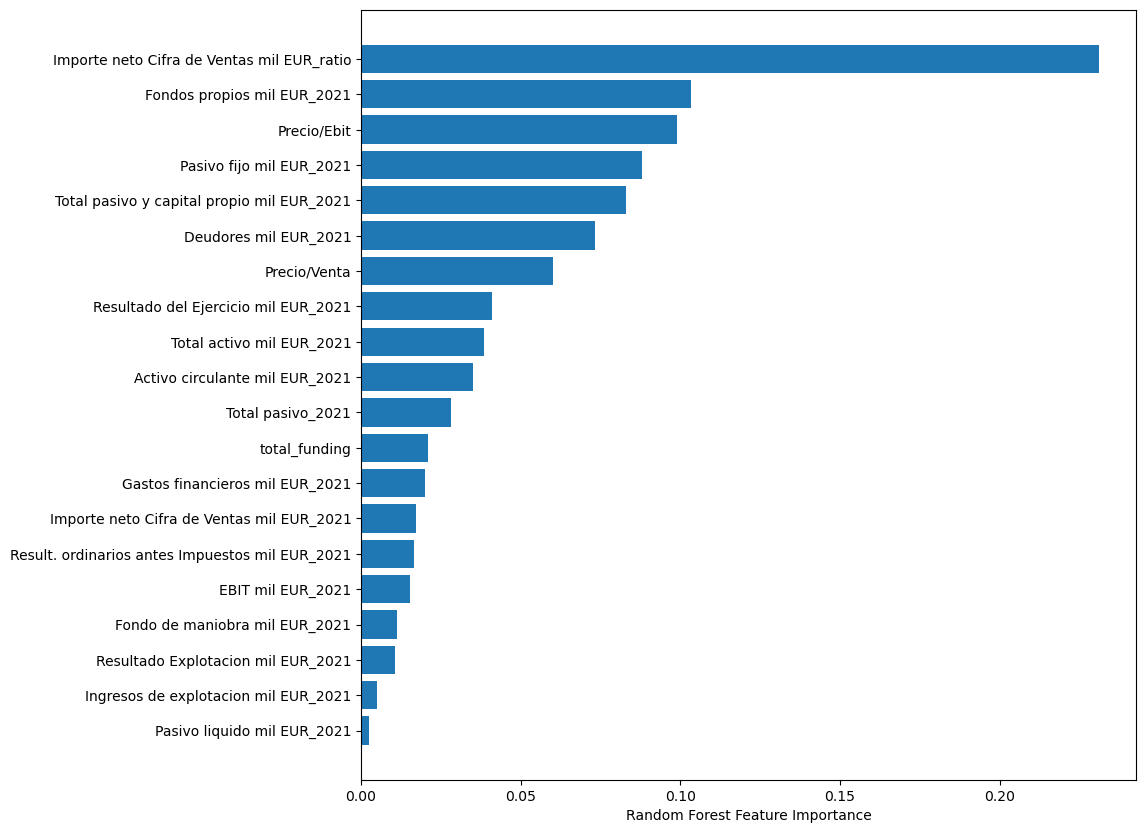

In [11]:
rf = RandomForestRegressor (random_state=0)
rf.fit(x_train, y_train)
print(dict(zip(DF_VALORACION.columns, rf.feature_importances_.round(2))))

forest_importances = pd.Series(rf.feature_importances_, index=DF_VALORACION.drop('valuation_2022', axis=1).columns).sort_values(ascending=True)
plt.figure(figsize=(10,10))
plt.barh(forest_importances.index, forest_importances)
plt.xlabel("Random Forest Feature Importance")

#Creacion de dataframe con importancia de caracteristicas forest_importances
forest_importances=forest_importances.to_frame().reset_index()
columns=['feature', 'importance']
forest_importances.columns=['feature', 'importance']
zero_features = list(forest_importances [forest_importances ['importance'] < 0.00025]['feature'])

In [12]:
space = {'criterion': hp.choice('criterion', ['poisson', 'friedman_mse', 'absolute_error', 'squared_error']),
         'max_depth': hp.quniform('max_depth', 10, 1200, 10),
         'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
         'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
         'min_samples_split': hp.uniform('min_samples_split', 0, 1),
         'n_estimators': hp.choice('n_estimators', [10, 50, 300, 750, 1200, 1300, 1500])
        }       

In [13]:
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    modelo2_bar_optimizado = RandomForestRegressor(**params)
    score = cross_val_score(modelo2_bar_optimizado, x_train, y_train, cv=2).mean()
    return {'loss': -score, 'status': 'ok'}

In [14]:
#Hyperparametros
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=80,
            trials=trials)
print("best: {}".format(best))

100%|██████████| 80/80 [03:19<00:00,  2.49s/trial, best loss: -0.278151351976694]  
best: {'criterion': 2, 'max_depth': 1030.0, 'max_features': 1, 'min_samples_leaf': 0.01184997783447789, 'min_samples_split': 0.22984823490592782, 'n_estimators': 4}


In [24]:
best_params = {'criterion': 'friedman_mse',  'max_depth': 1030, 'max_features': 1, 'min_samples_leaf': 0.01184997783447789, 'min_samples_split': 0.22984823490592782, 'n_estimators': 4}

In [25]:
#Bagging Regressor con los mejores parametros
modelo2_bar_optimizado = RandomForestRegressor(**best_params)
modelo2_bar_optimizado.fit(x_train,y_train)
predictions=modelo2_bar_optimizado.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo2_bar_optimizado = modelo2_bar_optimizado.score(x_test, y_test)
RMSE_modelo2_bar_optimizado = np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo2_bar_optimizado}')
print(f'The score obtained on test data is: {score_modelo2_bar_optimizado}')

The RMSE obtained on test data is: 33.442204808972456
The score obtained on test data is: 0.2391225815939506


**Boosting**

In [27]:
#Boosting Regressor (AdaBoost)
modelo3_bor_simple1 = AdaBoostRegressor(n_estimators=32,learning_rate=0.1)
modelo3_bor_simple1.fit(x_train,y_train)
predictions=modelo3_bor_simple1.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo3_bor_simple1=modelo3_bor_simple1.score(x_test, y_test)
RMSE_modelo3_bor_simple1=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_simple1}')
print(f'The score obtained on test data is: {score_modelo3_bor_simple1}')

The RMSE obtained on test data is: 38.498297581944264
The score obtained on test data is: -0.008342194752038568


In [29]:
#Boosting Regressor (GradientBoosting)
modelo3_bor_simple2 = GradientBoostingRegressor(n_estimators=32,learning_rate=0.1)
modelo3_bor_simple2.fit(x_train,y_train)
predictions=modelo3_bor_simple2.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo3_bor_simple2=modelo3_bor_simple2.score(x_test, y_test)
RMSE_modelo3_bor_simple2=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_simple2}')
print(f'The score obtained on test data is: {score_modelo3_bor_simple2}')

The RMSE obtained on test data is: 27.014150276357952
The score obtained on test data is: 0.5035134206179515


In [20]:
#Definimos algunos modelos basicos
base_estimator = GradientBoostingRegressor()

param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 200,1000,2000],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'loss': ['huber', 'squared_error', 'quantile', 'absolute_error']
}

modelo3_bor_level1_gs = RandomizedSearchCV(base_estimator, param_distributions=param_dist, n_iter=100, cv=5, random_state=1, n_jobs=-1)
modelo3_bor_level1_gs.fit(x_train, y_train)

#Gradien Boosting con los mejores parametros
best_params = modelo3_bor_level1_gs.best_params_
modelo3_bor_level1_gs = GradientBoostingRegressor(max_depth=best_params['max_depth'], 
                                                learning_rate=best_params['learning_rate'], 
                                                n_estimators=best_params['n_estimators'], 
                                                min_samples_split=best_params['min_samples_split'], 
                                                min_samples_leaf=best_params['min_samples_leaf'], 
                                                loss=best_params['loss'], 
                                                random_state=1)
modelo3_bor_level1_gs.fit(x_train, y_train)

#Observamos los mejores resultados
score_modelo3_bor_level1_gs = modelo3_bor_level1_gs.score(x_test, y_test)
RMSE_modelo3_bor_level1_gs=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_level1_gs}')
print(f'The score obtained on test data is: {score_modelo3_bor_level1_gs}')

The RMSE obtained on test data is: 32.96742865413217
The score obtained on test data is: -0.07187544805617407


In [21]:
#Guardamos el modelo
filename = 'modelo3_bor_level1_gs.sav'
ruta = './modelos_regresion/' + filename
pickle.dump(modelo3_bor_level1_gs, open(ruta, 'wb'))

In [33]:
#cargamos el modelo y vemos resultados
filename = 'modelo3_bor_level1_gs.sav'
modelo3_bor_level1_gs_cargado = pickle.load(open('./modelos_regresion/'+ filename, 'rb'))
score_modelo3_bor_level1_gs_cargado=modelo3_bor_level1_gs_cargado.score(x_test, y_test)
RMSE_modelo3_bor_level1_gs_cargado=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_level1_gs_cargado}')
print(f'The score obtained on test data is: {score_modelo3_bor_level1_gs_cargado}')

The RMSE obtained on test data is: 27.014150276357952
The score obtained on test data is: -0.07187544805617407


**XGBoost**

In [35]:
#XGBoost Regressor
modelo3_bor_xgboost=XGBRegressor()
modelo3_bor_xgboost.fit(x_train,y_train)
predictions=modelo3_bor_xgboost.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo3_bor_xgboost=modelo3_bor_xgboost.score(x_test, y_test)
RMSE_modelo3_bor_xgboost=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_xgboost}')
print(f'The score obtained on test data is: {score_modelo3_bor_xgboost}')

The RMSE obtained on test data is: 13.013102995105852
The score obtained on test data is: 0.8847909422227577


In [23]:
#Define the parameter grid to search over
catboost_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1,0.3],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [50, 100, 200],
    'border_count': [50, 100, 200],
    'random_strength': [0.1, 0.5, 1],
}

#XGBoost Regressor
modelo3_bor_xgboost=XGBRegressor()

modelo3_bor_xgboost_gs = GridSearchCV(
    estimator=modelo3_bor_xgboost,
    param_grid=catboost_params,
    n_jobs=-1,
    cv=5,
    verbose=3
)

#Fit the GridSearchCV object on the training data
modelo3_bor_xgboost_gs.fit(x_train, y_train)

#Observamos los mejores resultados
score_modelo3_bor_xgboost_gs=modelo3_bor_xgboost_gs.score(x_test, y_test)
RMSE_modelo3_bor_xgboost_gs=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_xgboost_gs}')
print(f'The score obtained on test data is: {score_modelo3_bor_xgboost_gs}')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[23:55:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "random_strength" } are not used.

The RMSE obtained on test data is: 32.96742865413217
The score obtained on test data is: -0.13585660087933427


In [24]:
#Guardamos el modelo
filename = 'modelo3_bor_xgboost_gs.sav'
ruta = './modelos_regresion/' + filename
pickle.dump(modelo3_bor_xgboost_gs, open(ruta, 'wb'))

In [18]:
#cargamos el modelo y vemos resultados
filename = 'modelo3_bor_xgboost_gs.sav'
modelo3_bor_xgboost_gs_cargado = pickle.load(open('./modelos_regresion/'+ filename, 'rb'))
score_modelo3_bor_xgboost_gs_cargado=modelo3_bor_xgboost_gs_cargado.score(x_test, y_test)
RMSE_modelo3_bor_xgboost_gs_cargado=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_xgboost_gs_cargado}')
print(f'The score obtained on test data is: {score_modelo3_bor_xgboost_gs_cargado}')

The RMSE obtained on test data is: 35.207707743732776
The score obtained on test data is: -0.13585660087933427


In [19]:
#CatBoost Regressor
modelo3_bor_catboost=CatBoostRegressor()
modelo3_bor_catboost.fit(x_train,y_train)
predictions=modelo3_bor_catboost.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_modelo3_bor_catboost=modelo3_bor_catboost.score(x_test, y_test)
RMSE_modelo3_bor_catboost=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_catboost}')
print(f'The score obtained on test data is: {score_modelo3_bor_catboost}')

Learning rate set to 0.025083
0:	learn: 27.8373252	total: 260ms	remaining: 4m 19s
1:	learn: 27.7088641	total: 261ms	remaining: 2m 10s
2:	learn: 27.4935543	total: 262ms	remaining: 1m 27s
3:	learn: 27.3213886	total: 263ms	remaining: 1m 5s
4:	learn: 27.1899855	total: 263ms	remaining: 52.4s
5:	learn: 27.0077696	total: 264ms	remaining: 43.8s
6:	learn: 26.8285482	total: 265ms	remaining: 37.6s
7:	learn: 26.6652198	total: 266ms	remaining: 33s
8:	learn: 26.4826671	total: 267ms	remaining: 29.4s
9:	learn: 26.3252570	total: 268ms	remaining: 26.5s
10:	learn: 26.2267271	total: 269ms	remaining: 24.2s
11:	learn: 26.0840238	total: 270ms	remaining: 22.2s
12:	learn: 25.8721552	total: 271ms	remaining: 20.6s
13:	learn: 25.6996929	total: 273ms	remaining: 19.2s
14:	learn: 25.5224480	total: 274ms	remaining: 18s
15:	learn: 25.3633734	total: 275ms	remaining: 16.9s
16:	learn: 25.2420750	total: 275ms	remaining: 15.9s
17:	learn: 25.0420277	total: 276ms	remaining: 15.1s
18:	learn: 24.8382317	total: 277ms	remaining:

In [27]:
#Define the parameter grid to search over
catboost_params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1,0.3],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [50, 100, 200],
    'border_count': [50, 100, 200],
    'random_strength': [0.1, 0.5, 1],
}

#CatBoost Regressor
modelo3_bor_catboost = CatBoostRegressor()

modelo3_bor_catboost_gs = GridSearchCV(
    estimator=modelo3_bor_catboost,
    param_grid=catboost_params,
    n_jobs=-1,
    cv=5,
    verbose=3
)

#Fit the GridSearchCV object on the training data
modelo3_bor_catboost_gs.fit(x_train, y_train)

#Observamos los mejores resultados
score_modelo3_bor_catboost_gs=modelo3_bor_catboost_gs.score(x_test, y_test)
RMSE_modelo3_bor_catboost_gs=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_catboost_gs}')
print(f'The score obtained on test data is: {score_modelo3_bor_catboost_gs}')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
0:	learn: 27.5972540	total: 2.22ms	remaining: 109ms
1:	learn: 27.0962060	total: 7.02ms	remaining: 168ms
2:	learn: 26.6808469	total: 9.1ms	remaining: 143ms
3:	learn: 26.0469637	total: 11.1ms	remaining: 127ms
4:	learn: 25.4583713	total: 12.9ms	remaining: 116ms
5:	learn: 25.0478465	total: 14.7ms	remaining: 108ms
6:	learn: 24.6289307	total: 16.4ms	remaining: 101ms
7:	learn: 24.2355758	total: 18.2ms	remaining: 95.7ms
8:	learn: 24.0016921	total: 20.5ms	remaining: 93.3ms
9:	learn: 23.6978315	total: 22.4ms	remaining: 89.7ms
10:	learn: 23.3834543	total: 24.3ms	remaining: 86.3ms
11:	learn: 23.1368944	total: 26.1ms	remaining: 82.6ms
12:	learn: 22.8459338	total: 27.8ms	remaining: 79.1ms
13:	learn: 22.5644067	total: 29.7ms	remaining: 76.3ms
14:	learn: 22.0863637	total: 31.7ms	remaining: 74ms
15:	learn: 21.5584333	total: 33.9ms	remaining: 72.1ms
16:	learn: 21.1419623	total: 36ms	remaining: 69.8ms
17:	learn: 20.7951826	total: 38.1ms	rema

In [28]:
#Guardamos el modelo
filename = 'modelo3_bor_catboost_gs.sav'
ruta = './modelos_regresion/' + filename
pickle.dump(modelo3_bor_catboost_gs, open(ruta, 'wb'))

In [20]:
#cargamos el modelo y vemos resultados
filename = 'modelo3_bor_catboost_gs.sav'
modelo3_bor_catboost_gs_cargado = pickle.load(open('./modelos_regresion/'+ filename, 'rb'))
score_modelo3_bor_catboost_gs_cargado=modelo3_bor_catboost_gs_cargado.score(x_test, y_test)
RMSE_modelo3_bor_catboost_gs_cargado=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_modelo3_bor_catboost_gs_cargado}')
print(f'The score obtained on test data is: {score_modelo3_bor_catboost_gs_cargado}')

The RMSE obtained on test data is: 34.05491955542251
The score obtained on test data is: 0.05757246759931034


**Automated Machine Learning (AutoML)**

In [21]:
#Realizamos un TPOT para ver si podemos mejorar los resultados
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(x_train, y_train)
y_pred=tpot.predict(x_test)
mse = mean_squared_error(y_test, predictions)
score_tpot=tpot.score(x_test, y_test)
RMSE_tpot=np.sqrt(mse)
print(f'The RMSE obtained on test data is: {RMSE_tpot}')
print(f'The score obtained on test data is: {score_tpot}')

                                                                              
Generation 1 - Current best internal CV score: -518.6635063814149
                                                                              
Generation 2 - Current best internal CV score: -0.6101211412399505
                                                                              
Generation 3 - Current best internal CV score: -0.6101211412399505
                                                                              
Generation 4 - Current best internal CV score: -0.6101211412399505
                                                                              
Generation 5 - Current best internal CV score: -1.608671345266924e-25
                                                                              
Best pipeline: LassoLarsCV(PolynomialFeatures(CombineDFs(input_matrix, input_matrix), degree=2, include_bias=False, interaction_only=False), normalize=True)
The RMSE obtained on test data i

**RESULTADOS**

In [37]:
models = pd.DataFrame([
    {'Model': 'Linear Regression', 'RMSE': RMSE_modelo0_lr, 'Score': score_modelo0_lr},
    {'Model': 'Tweddie Regression', 'RMSE': RMSE_modelo0_tr, 'Score': score_modelo0_tr},
    {'Model': 'Stacking Regressor Simple:', 'RMSE': RMSE_modelo1_sr_simple, 'Score': score_modelo1_sr_simple},
    {'Model': 'Stacking Regressor Level1', 'RMSE': RMSE_modelo1_sr_level1, 'Score': score_modelo1_sr_level1},
    # {'Model': 'Stacking Regressor Level1 Grid Search', 'RMSE': RMSE_modelo1_sr_level1_gs_cargado, 'Score': score_modelo1_sr_level1_gs_cargado},
    {'Model': 'Stacking Regressor Level2', 'RMSE': RMSE_modelo1_sr_level2, 'Score': score_modelo1_sr_level2},
    {'Model': 'Stacking Regressor Level2 Grid Search', 'RMSE': RMSE_modelo1_sr_level2_gs_cargado, 'Score': score_modelo1_sr_level2_gs_cargado},
    {'Model': 'Bagging Regressor (RandomForest)', 'RMSE': RMSE_modelo2_bar_simple, 'Score': score_modelo2_bar_simple},
    {'Model': 'Bagging Regressor (RandomForest) Optimizado', 'RMSE': RMSE_modelo2_bar_optimizado, 'Score': score_modelo2_bar_optimizado},
    {'Model': 'Boosting Regressor (AdaBoost)', 'RMSE': RMSE_modelo3_bor_simple1, 'Score': score_modelo3_bor_simple1},
    {'Model': 'Boosting Regressor (GradientBoost)', 'RMSE': RMSE_modelo3_bor_simple2, 'Score': score_modelo3_bor_simple2},
    {'Model': 'Boosting Regressor (GradientBoost) Grid Search', 'RMSE': RMSE_modelo3_bor_level1_gs_cargado, 'Score': score_modelo3_bor_level1_gs_cargado},
    {'Model': 'XGBoost', 'RMSE': RMSE_modelo3_bor_xgboost, 'Score': score_modelo3_bor_xgboost},
    {'Model': 'XGBoost Grid Search', 'RMSE': RMSE_modelo3_bor_xgboost_gs_cargado, 'Score': score_modelo3_bor_xgboost_gs_cargado},
    {'Model': 'CatBoost', 'RMSE': RMSE_modelo3_bor_catboost, 'Score': score_modelo3_bor_catboost},
    {'Model': 'CatBoost Grid Search', 'RMSE': RMSE_modelo3_bor_catboost_gs_cargado, 'Score': score_modelo3_bor_catboost_gs_cargado},
    {'Model': 'AutoML', 'RMSE': RMSE_tpot, 'Score': score_tpot}
])
models.sort_values(by='RMSE', ascending=False)

,Model,RMSE,Score
1,Tweddie Regression,47.578307,-5.400785e-01
3,Stacking Regressor Level1,42.681198,-2.393618e-01
0,Linear Regression,41.643353,-1.798214e-01
4,Stacking Regressor Level2,40.846959,-1.351267e-01
5,Stacking Regressor Level2 Grid Search,40.846959,-1.811041e-01
8,Boosting Regressor (AdaBoost),38.498298,-8.342195e-03
6,Bagging Regressor (RandomForest),35.207708,1.566645e-01
12,XGBoost Grid Search,35.207708,-1.358566e-01
2,Stacking Regressor Simple:,35.104566,1.615984e-01
13,CatBoost,34.054920,2.109862e-01
